# Exploratory Data Analysis

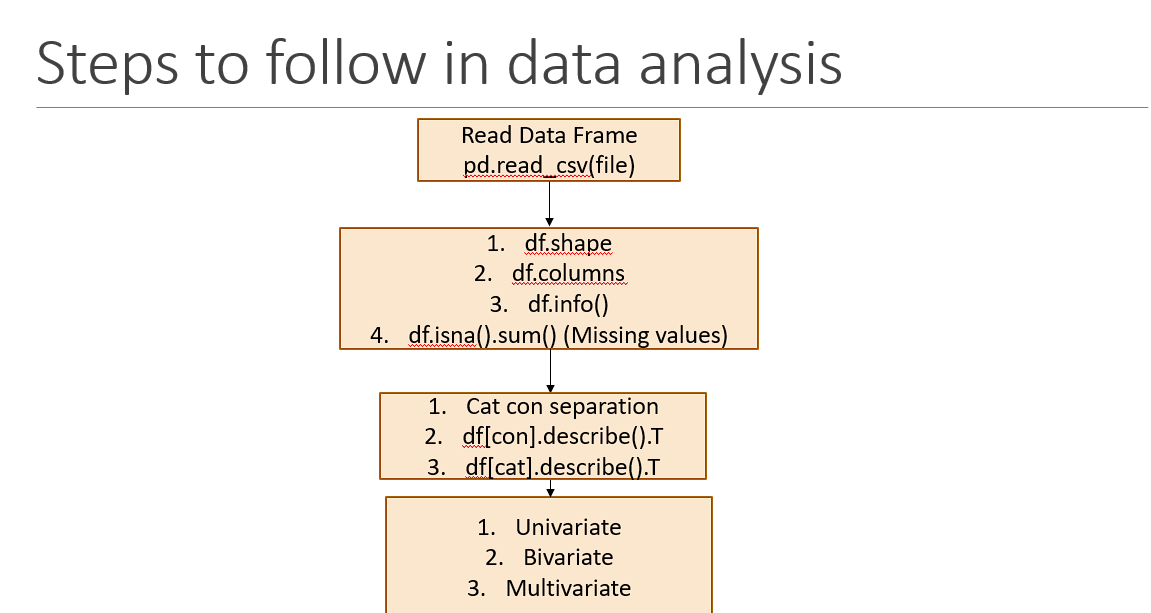

### Step 1: Reading the dataset

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import os 
os.chdir('E:/Datasets/')

In [3]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Step 2: Check basic info about dataframe

In [4]:
df.shape

(150, 5)

In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

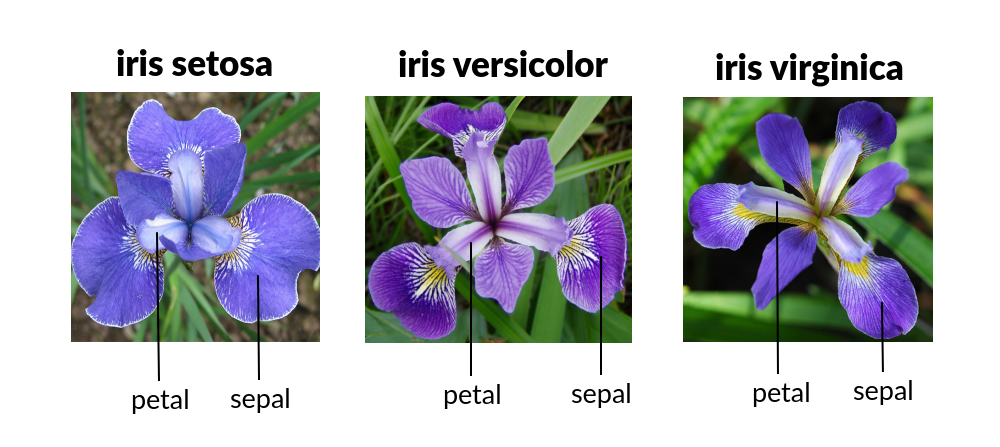

In [6]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Step 3: Descriptive analytics

#### Seperate categorical and continuous variables

In [10]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [11]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [12]:
cat = list(df.columns[df.dtypes=='object'])
con = list(df.columns[df.dtypes!='object'])

In [13]:
cat

['species']

In [14]:
con

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

### Show the descriptive statistics

In [15]:
df[con].describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [16]:
df[cat].describe().T

,count,unique,top,freq
species,150,3,setosa,50


### Step 4 : Univariate Analysis

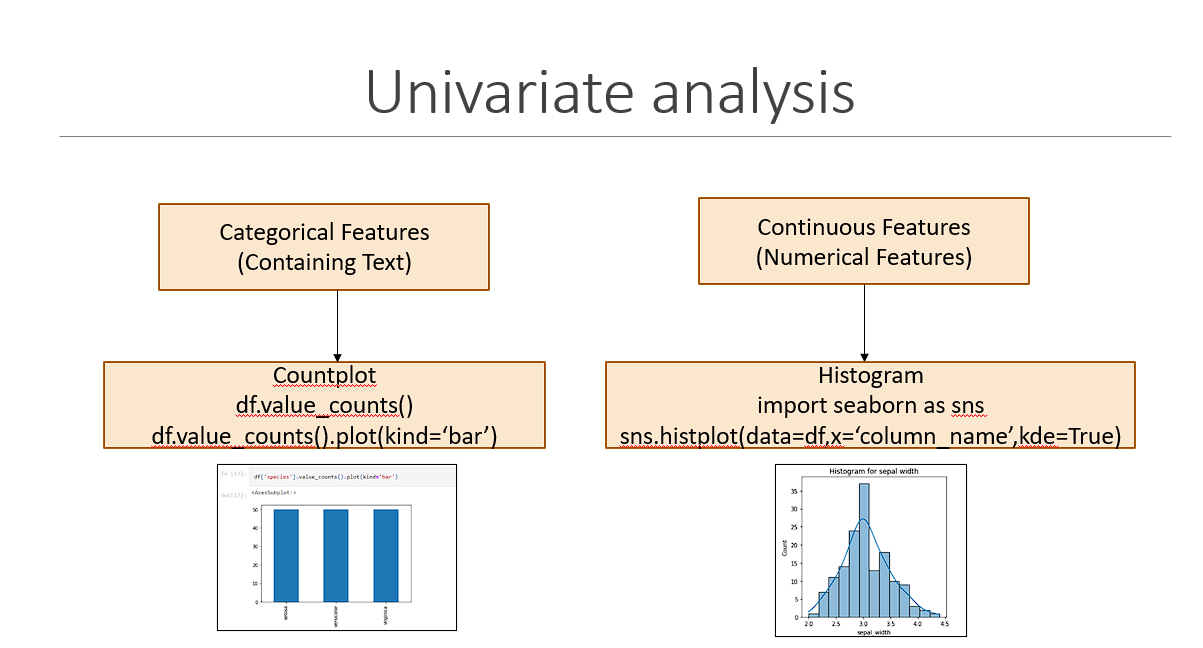

#### Count Plot for Categorical Features

In [17]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<AxesSubplot:title={'center':'Count Plot for Species'}, xlabel='Species', ylabel='counts'>

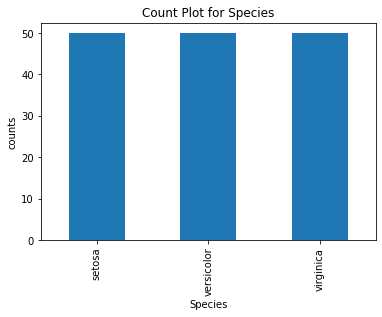

In [18]:
df['species'].value_counts().plot(kind='bar',
                                  title='Count Plot for Species',
                                  xlabel='Species',
                                  ylabel='counts')

#### Continuous features  Histogram

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

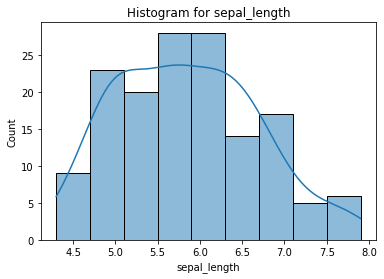

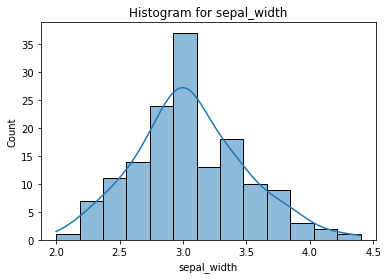

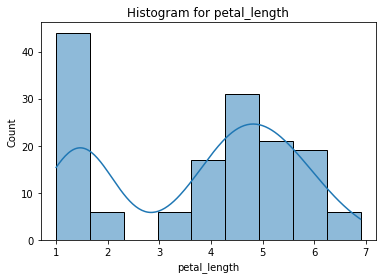

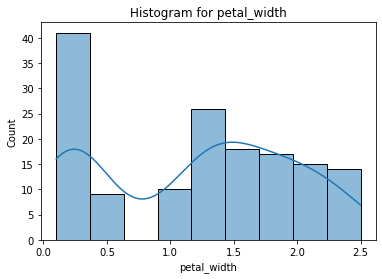

In [20]:
for i in con:
    sns.histplot(data=df,x=i,kde=True)
    plt.title(f'Histogram for {i}')
    plt.show()

### creating subplot

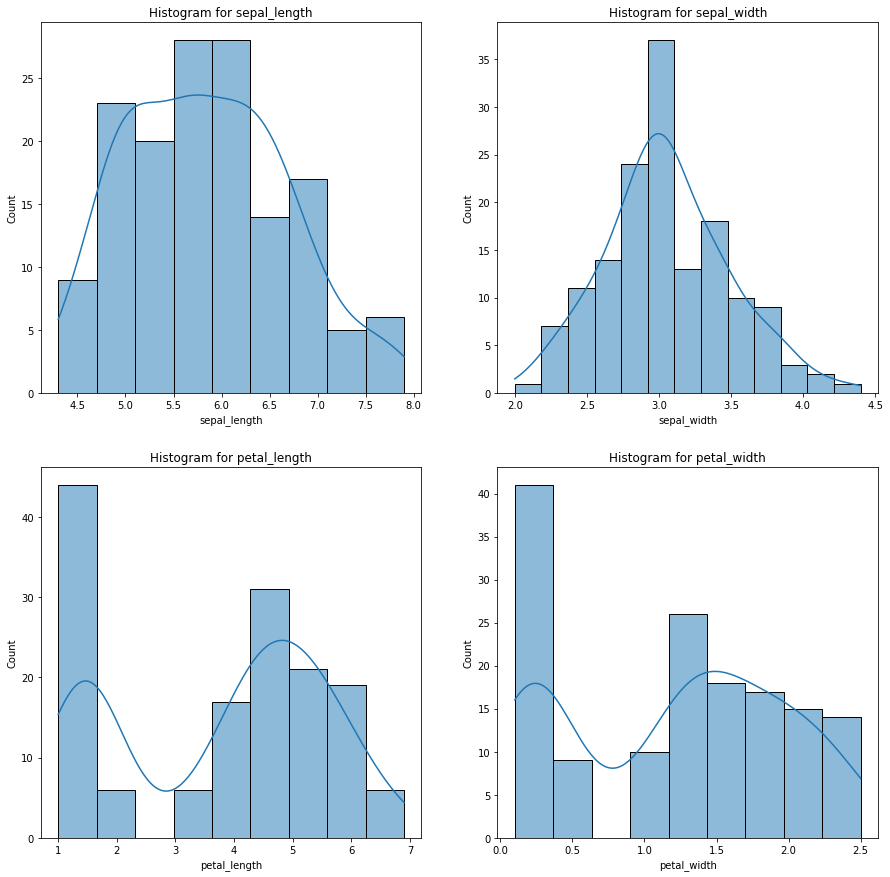

In [22]:
x = 1
plt.figure(figsize=(15,15))
for i in con:
    plt.subplot(2,2,x)
    x = x+1
    sns.histplot(data=df,x=i,kde=True)
    plt.title(f'Histogram for {i}')
plt.show()

### Step 5: Bivariate Analysis

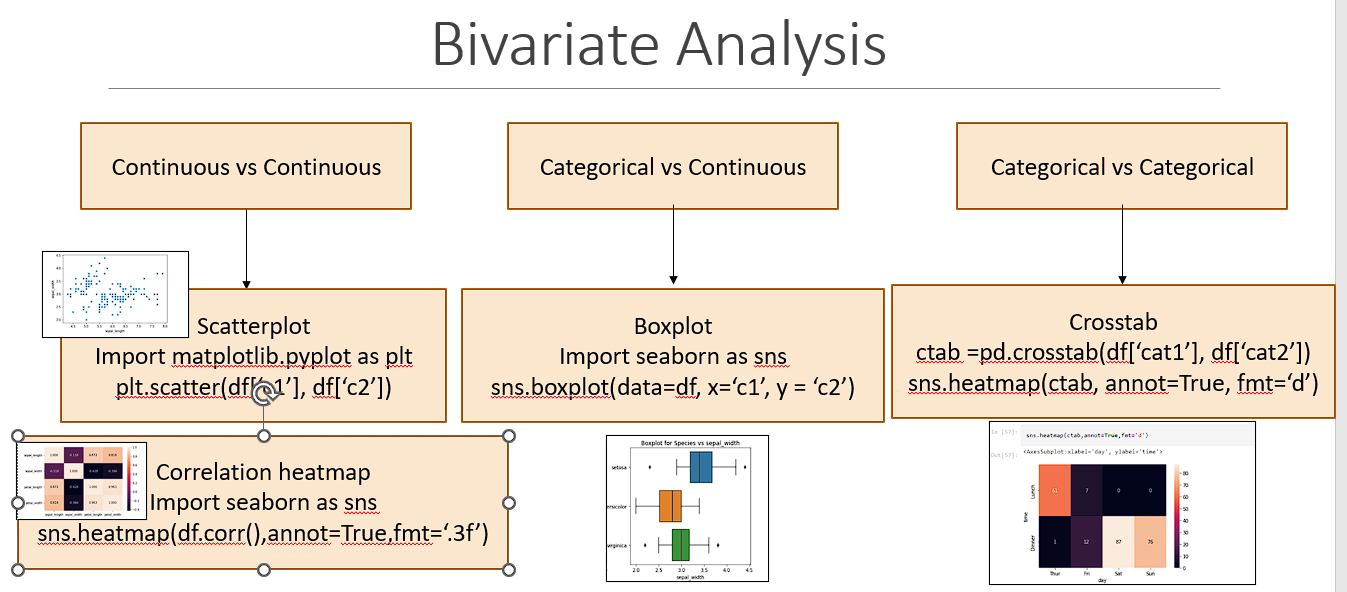

### Con vs Con features
1. Scatter Plot
2. Correlation Heatmap

In [23]:
con

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

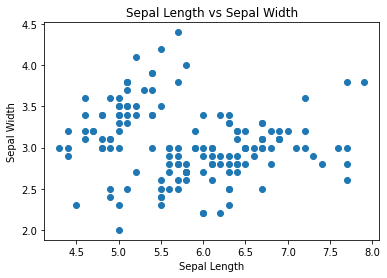

In [25]:
plt.scatter(df['sepal_length'],df['sepal_width'])
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

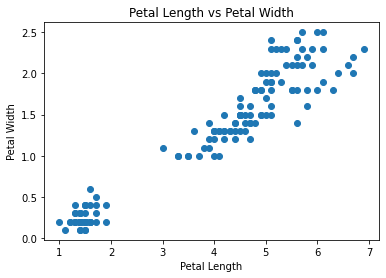

In [26]:
plt.scatter(df['petal_length'],df['petal_width'])
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

### Correlation Heatmap

In [27]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

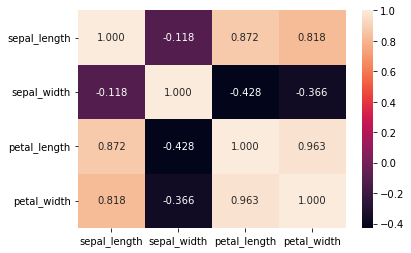

In [28]:
sns.heatmap(df.corr(),annot=True,fmt='.3f')

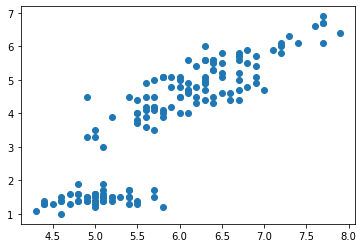

In [29]:
plt.scatter(df['sepal_length'],df['petal_length'])

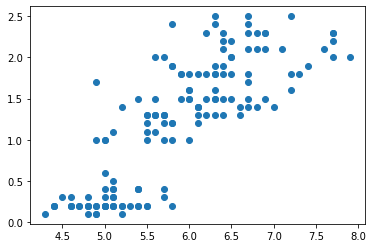

In [30]:
plt.scatter(df['sepal_length'],df['petal_width'])

In [31]:
c = df.corr().iloc[0:2,0:2]
c

,sepal_length,sepal_width
sepal_length,1.00000,-0.11757
sepal_width,-0.11757,1.00000


<AxesSubplot:>

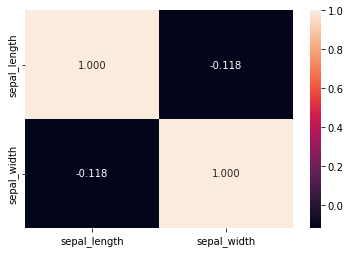

In [34]:
sns.heatmap(c,annot=True,fmt='.3f')

### Categorical vs Continuous plot
Boxplot

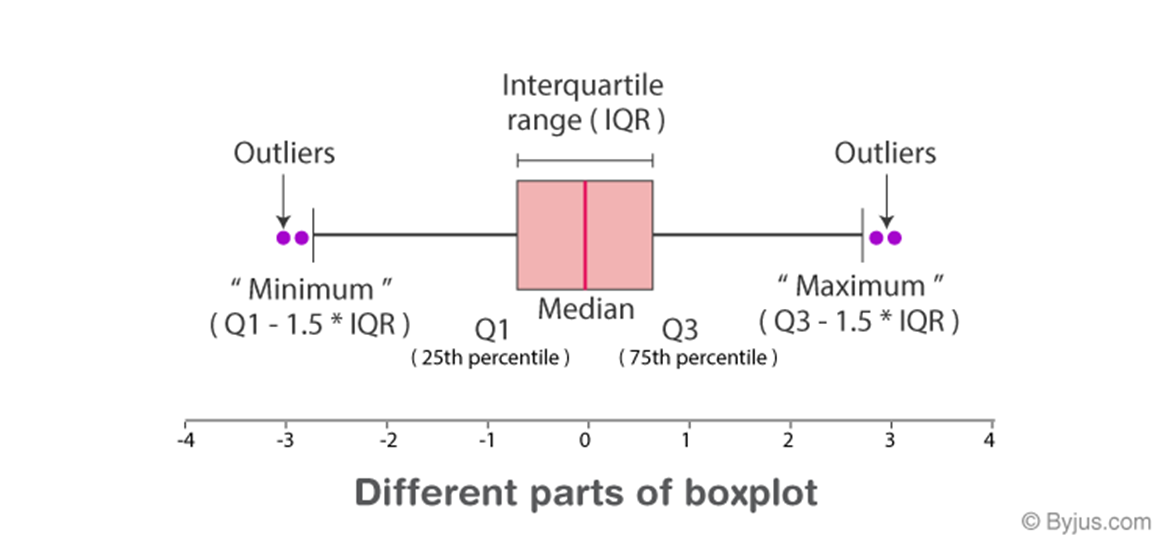

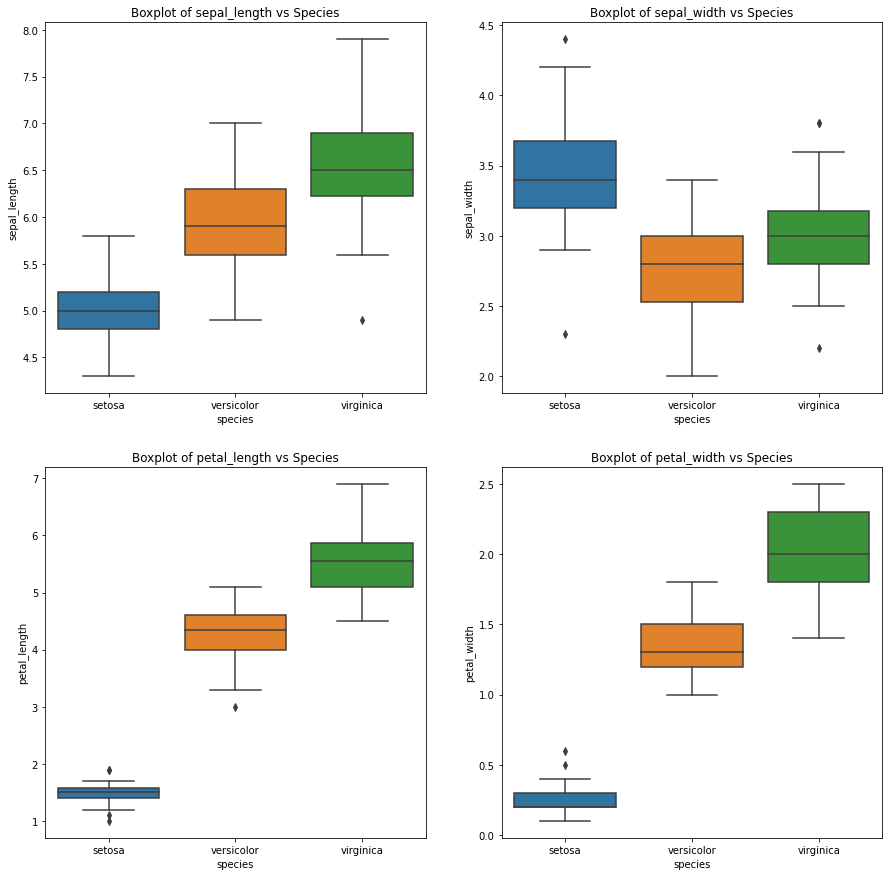

In [35]:
plt.figure(figsize=(15,15))
x = 1
for i in con:
    plt.subplot(2,2,x)
    x = x+1
    sns.boxplot(data=df,x='species',y=i)
    plt.title(f'Boxplot of {i} vs Species')
plt.show()

### Step 6 : Multivariate Analysis

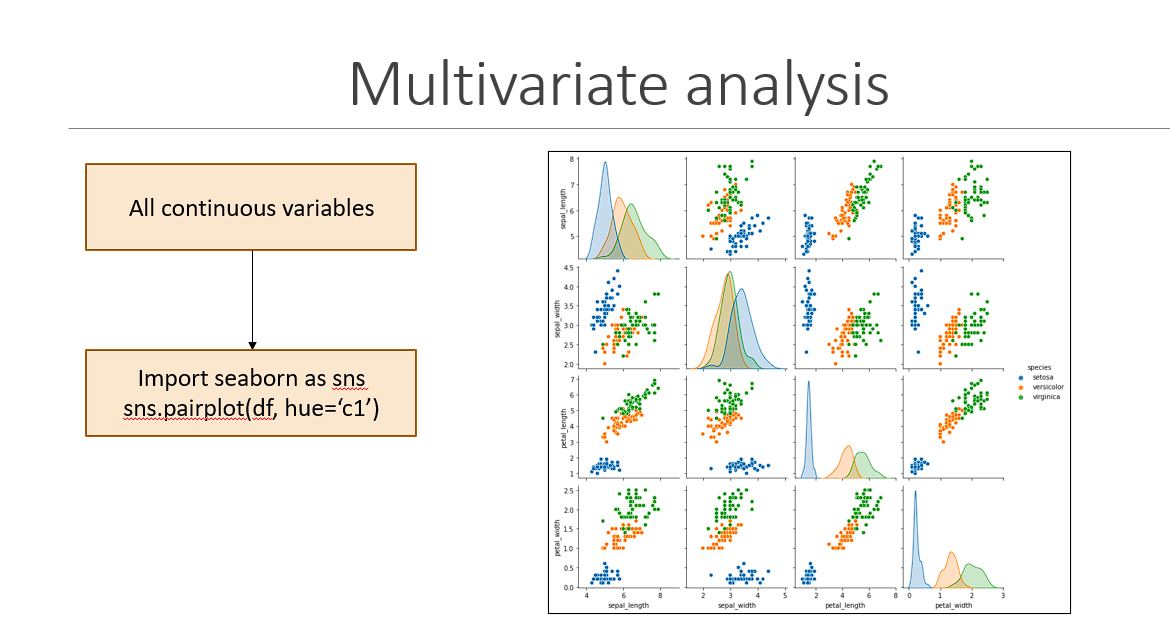

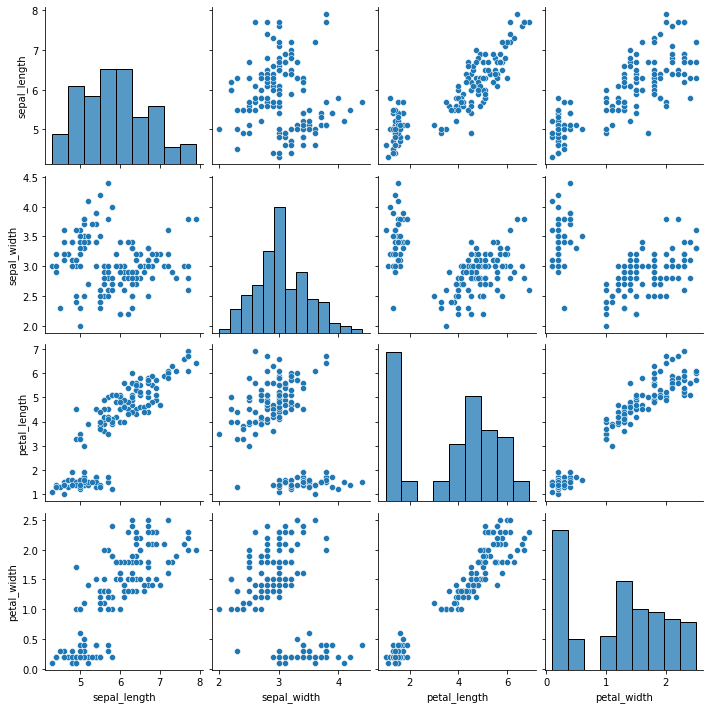

In [36]:
sns.pairplot(df)

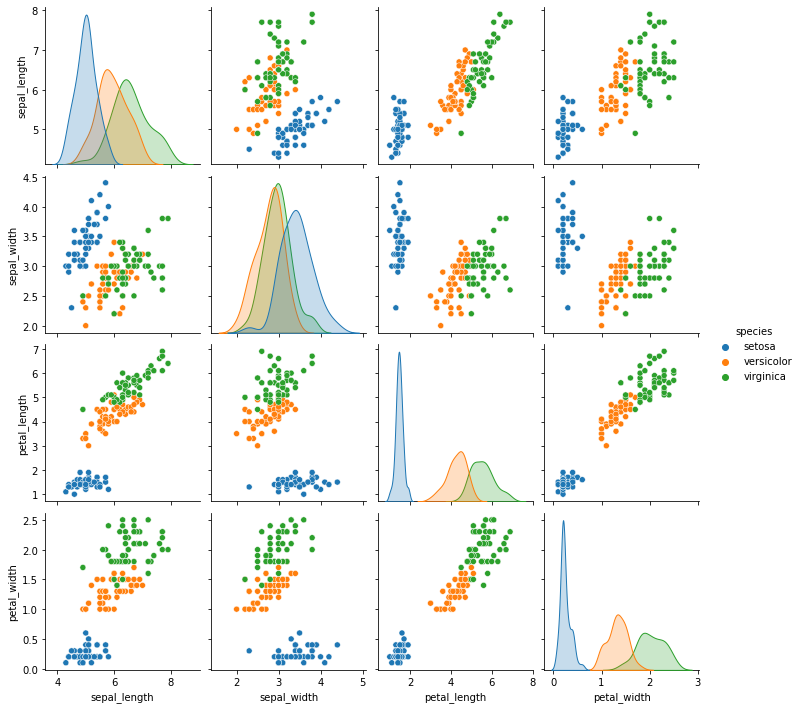

In [37]:
sns.pairplot(df,hue='species')